## Introduction: Data, EDA and Algorithm


This notebook aimed at building a relative effective K-NN model.


### Data

The observation in dataframe(can be saved as ".csv file") will be something looking like:
    
Matrix form:

               RGB-data of image                             |                             Label
    np.array([[c11,...,c1n],[c21,...,c2n],[cr1,...,crn]])    |                              rhino
    
where r = row_num, c = column_num, and row_number = column_num here.
The data will contain 5 species of animals


### Data preprocessing

The data preprocessing here including:

+ Step 1: Image Augmentation
+ Step 2: Image Enhancement Technique: Transform RGB to Gray-255 images, sharpen images
+ Step 3: Image Segementation Technique: Finding Features


### Algorthim



**Metrics of model performance**:
1. Accuracy
2. True positive vs. False positive
3. Balanced Accuracy


### EDA
**Including:**
1. Raw images presentation 
2. Augmented images presentation
3. Enhanced imgaes presentation
4. Presentation: Images used for models

In [1]:
import Augmentor
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

_______________
### Data Preprocessing, step 1: Image Augmentation

### Data Preprocessing: Step 2: Image Enhancement


### Data Preprocessing: step 3: Image Segementation

#### Gradient Operator vs. Topological Morpology

____________________

### Standard Procedure of Processing Images to Model Dataset

1. Sharpen images
2. Method I: sobel operator; Method II: morphology
3. Ensemble data

In [2]:
#### Reading data
# From images to vetors
# require scipy.ndimage; \
from skimage.filters import sobel
import skimage.morphology as morphology
from scipy import ndimage
import matplotlib.image as mpimg

##--------------------------------------------------------
#from RGB to gray-value image
ratio = [0.299, 0.587, 0.114]
def rgb2gray(rgb, ratio = [0.299, 0.587, 0.114]):
    return np.dot(rgb[...,:3], ratio)  
#the ratio can be modified for different formulas generating gray-valued images

##--------------------------------------------------------------------------------------------------
def image_2_array(image_filename, shaperen = True, shaperen_coef = 30, sobel_op = True, denoise = False, 
                  watershed_op = False, mark_threshold_lower = 2, mark_threshold_upper = 98): 
    """
        This function is to transfer image into corresponding vector of form:
    gray-data of image                        |                           Label
    np.array([[c1,...,cn],[]])                |                            rhino
    """
    
    image_tensor = mpimg.imread(image_filename)
    im_processed = rgb2gray(image_tensor).astype(float)
    if (int(len(image_tensor.reshape(-1))) % 3 != 0):
        return np.nan
    else:
        if shaperen:
            filtered_im = ndimage.gaussian_filter(im_processed, 1)
            sharpened_im = im_processed + shaperen_coef*(im_processed - filtered_im)
            im_processed = sharpened_im
    
        if denoise:
            im_processed = ndimage.gaussian_filter(im_processed, 3)
        
        if sobel_op:
            im_processed = sobel(im_processed)
            
        if (watershed_op & sobel_op):
            markers = np.zeros_like(im_processed)
            
            markers[im_processed < np.percentile(im_processed, mark_threshold_lower)] = 1
            markers[im_processed > np.percentile(im_processed, mark_threshold_upper)] = 2
            
            seg_op = morphology(im_processed, markers)
            im_processed = seg_op
    
        return(im_processed)
    
##-------------------------------------------------------------------------------
    
def read_oneGeneric_file(filename,*args, **kwargs):
    """
        This function is to apply the first function to one generic image
    say, transfer all bass(a kind of fish) images into vector form
    """

    allFiles = os.listdir(filename)
    arrayed_images_oneGeneric = [] #create an empty list to hold matrix of one generic data
    count = 0
    labelname = filename.split("//")[1]
    for f in allFiles:
        f = filename + "/" + f
        arrayed_images_oneGeneric.append(image_2_array(f, args))
        count += 1
    return arrayed_images_oneGeneric, labelname, count #can be modified, count or labelname etc. can be omitted in output
##-----------------------------------------------------------------------------


def read_wholeGenericFile(whole_generic_filename,*args, **kwargs):
    """
        This function is to apply the first function to all generic images
    say, transfer all 21 kinds animals' images into vector form
    """

    allGenericFilename = os.listdir(whole_generic_filename)

    oneGeneric_file_path = []
    
    for oneGeneric_file in allGenericFilename:
        oneGeneric_file = whole_generic_filename + "/" + oneGeneric_file
        oneGeneric_file_path.append(oneGeneric_file)
        
    return(oneGeneric_file_path)
##------------------------------------------------------------------------------

def with_all_2_df(oneGeneric_file_path,*args, **kwargs):
    """
     This function is to generate a dataframe to save vetors processed by read_wholeGenericFile() function
    """
   
    df_wholeGeneric = pd.DataFrame({"non_divided_channel": [], 
                                    "label_name": []})
    
    for file_path in oneGeneric_file_path:
        oneGeneric_data, oneGeneric_label, oneGeneric_count = read_oneGeneric_file(file_path)
        df_temp = pd.DataFrame({"non_divided_channel": oneGeneric_data, 
                                    "label_name": [oneGeneric_label]*oneGeneric_count})
        df_wholeGeneric = pd.concat([df_wholeGeneric, df_temp], ignore_index=True)
    
    return df_wholeGeneric

In [32]:
##make sure the working directory now is something like "~/modified_knn_ver1" which is the upper level of "~/output/" directory
##the later one is the directory under which augmented imagesa are stored.

#### First model dataset: based on Sobel operator

In [3]:
oneGeneric_file_path = read_wholeGenericFile("augmented_selected_datasat/")
df_species_Sobel = with_all_2_df(oneGeneric_file_path)  #with sharpen and sobel, takes a long time

In [4]:
df_species_Sobel.head()

,non_divided_channel,label_name
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body


In [5]:
df_species_Sobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
non_divided_channel    1971 non-null object
label_name             2000 non-null object
dtypes: object(2)
memory usage: 31.3+ KB


### Applying PCA

In [5]:
from sklearn.decomposition import PCA

df_species_Sobel_dropna = pd.DataFrame(df_species_Sobel.dropna())
df_species_Sobel_dropna['data_vector'] = df_species_Sobel_dropna['non_divided_channel'].apply(lambda x: x.reshape(-1))
df_species_Sobel_dropna['length_data'] = df_species_Sobel_dropna['data_vector'].apply(lambda x: len(x))


# pca = PCA(n_components=30)

# pca_30_list = []
# pca_30_variance_ratio = []
# for i in range(df_species_Sobel_dropna.shape[0]):
#     pca_30_list.append(pca.fit_transform(df_species_Sobel_dropna.iloc[i]['non_divided_channel']))
#     pca_30_variance_ratio.append(pca.explained_variance_ratio_)

# PrincipleDF = pd.DataFrame({'pca_tensor': pca_30_list, 
#                             "pca_variance_ratio": pca_30_variance_ratio, 
#                             "category": df_species_Sobel_dropna['label_name']})

In [11]:
# PrincipleDF.head()

# PrincipleDF['cumulative_variance_ratio'] = PrincipleDF['pca_variance_ratio'].apply(lambda x: np.sum(x))

# PrincipleDF.groupby(['category'])['cumulative_variance_ratio'].mean()

# plt.figure(figsize = (10,10))
# sns.boxplot(x = 'category', y = 'cumulative_variance_ratio', data = PrincipleDF)
# plt.savefig('PCA_images/Variance_ratio_PCA.png', dpi = 400)
        

In [25]:
# from sklearn.model_selection import train_test_split

# X = PrincipleDF['pca_tensor'].apply(lambda x: x[:,2].reshape(-1))
# y = PrincipleDF['category']
# X_train, X_test, y_train, y_test = train_test_split(X , y, 
#                                                    test_size = 0.3,
#                                                    random_state = 123,
#                                                    shuffle = True,
#                                                    stratify = y)

In [6]:
np.unique(df_species_Sobel_dropna['label_name'])

array(['cougar_body', 'dolphin', 'elephant', 'hedgehog', 'rhino'],
      dtype=object)

In [7]:
df_species_Sobel_dropna['listed_vector'] = df_species_Sobel_dropna['non_divided_channel'].apply(lambda x: x.reshape(-1).tolist())

quene = list()
for j in range(1971):
    for i in df_species_Sobel_dropna['listed_vector'].values[j]:
        quene.append(i)

X = np.array(quene).reshape(1971, 128*128)

y = df_species_Sobel_dropna['label_name'].values

In [8]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

print ('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (1971, 16385)


<Figure size 432x288 with 0 Axes>

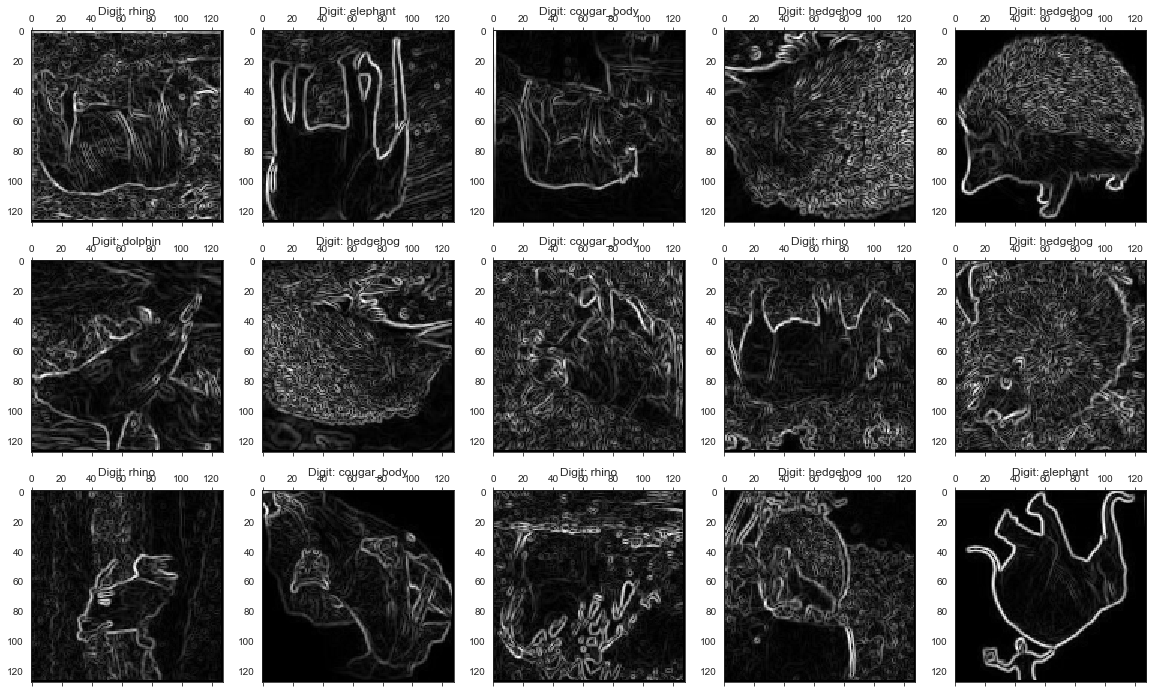

In [70]:
rndperm = np.random.permutation(df.shape[0])

sns.set_style("white")
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(20,12) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((128,128)).astype(float))
plt.show()

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
pca_result = pca.fit_transform(df[feat_cols].values)

# df['pca-one'] = pca_result[:,0]
# df['pca-two'] = pca_result[:,1] 
# df['pca-three'] = pca_result[:,2]
pca_feature_cols = ['pca' + str(i) for i in range(1,31)]
df_2 = pd.DataFrame(pca_result, columns=pca_feature_cols)
df_2['label'] = df['label'].values

df_2.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,label
0,-168.320795,-269.490061,557.237232,362.316121,-127.880129,-574.941691,265.505290,-255.810774,-96.822455,-195.253675,...,-101.921488,56.668263,8.093153,-86.131317,122.345214,100.377120,-83.360485,-81.394574,148.170362,cougar_body
1,-259.513577,-139.149075,598.707443,-104.991327,-213.191961,-411.684586,-376.410110,260.263747,-6.870848,45.613012,...,292.136496,-306.298614,215.423272,-140.591672,-54.454370,-106.624850,-68.455071,-55.921654,-53.571472,cougar_body
2,-203.898835,-148.754886,604.269784,219.377608,-207.889339,-453.032325,318.444430,-387.088150,-114.042356,-15.371555,...,-39.315139,110.993281,67.740996,11.962060,153.967727,69.428371,-53.938724,-17.850999,-36.101453,cougar_body
3,-259.513577,-139.149075,598.707443,-104.991327,-213.191961,-411.684586,-376.410110,260.263747,-6.870848,45.613012,...,292.136496,-306.298614,215.423272,-140.591672,-54.454370,-106.624850,-68.455071,-55.921654,-53.571472,cougar_body
4,-252.382984,164.634084,-7.354459,-597.481856,18.085981,313.542423,-80.874717,469.151749,-44.698686,-212.330709,...,305.846304,-122.853937,50.115035,-63.875036,-83.596082,84.280132,37.467814,-94.244883,-36.026430,cougar_body


In [10]:
pca.explained_variance_ratio_

array([0.10221476, 0.02675967, 0.01933498, 0.01503414, 0.01313365,
       0.01133378, 0.01014459, 0.00935466, 0.00815294, 0.0072566 ,
       0.00645815, 0.00604665, 0.00589444, 0.0056866 , 0.00526386,
       0.00512176, 0.0046926 , 0.00430103, 0.00422037, 0.00416305,
       0.00405532, 0.00394406, 0.00382961, 0.00368259, 0.00349375,
       0.00345858, 0.00343017, 0.0032904 , 0.00318947, 0.00315756])

In [44]:
# must run this cell if skip to tSNE
d = {}
label_num = 1
for obj in np.unique(df_2['label']):
    d[obj] = label_num
    label_num+=1

df_2['label_num'] = df_2['label'].map(d)

# All codes before this cell must be executed (Except codes only for drawing figures)

In [11]:
from sklearn.model_selection import train_test_split


# X = PrincipleDF['pca_tensor'].apply(lambda x: x[:,2].reshape(-1))
# y = PrincipleDF['category']
X_train, X_test, y_train, y_test = train_test_split(df_2.iloc[:,:30],
                                                    df_2['label'],
                                                    test_size = 0.1,
                                                    random_state = 123,
                                                    shuffle = True,
                                                    stratify = y)

In [91]:
X_train.shape, y_train.shape

((1773, 30), (1773,))

In [92]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# build a classifier
rf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(11, 20),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 46.49 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.731 (std: 0.012)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 13, 'min_samples_split': 5}

Model with rank: 2
Mean validation score: 0.728 (std: 0.016)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 11, 'min_samples_split': 4}

Model with rank: 3
Mean validation score: 0.723 (std: 0.029)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 14, 'min_samples_split': 4}



In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_best = RandomForestClassifier(n_estimators=20,
                                 criterion='entropy', 
                                 max_features=13, 
                                 min_samples_split=5,
                                 bootstrap=False, 
                                 max_depth=None)

In [13]:
rf_best.fit(X_train, y_train)
rf_pred = rf_best.predict(X_test)

In [14]:
rf_best.score(X_test, y_test)

0.7727272727272727

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

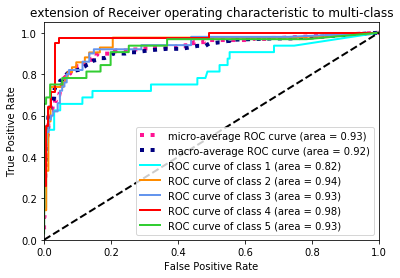

In [18]:
#AUC ROC 
##only draw the picture for the best param of a certain
#since definition of AUC ROC is for binary variable, first of all, we need to binarizing our result
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

##binarize y_test:
y_test_bi = label_binarize(le.fit_transform(y_test), [0,1,2,3,4])

##binarize predict value:
knn_bi = OneVsRestClassifier(rf_best) #change classifier here
y_score_bi = knn_bi.fit(X_train, y_train).predict_proba(X_test)
#y_score_bi = label_binarize(y_score, [1,2,3,4,5])
#method may vary according to estimator, if the function is RandomForest or SVC 
#y_score_bi = YourClassifier.fit(list(X_train), y_train).predict(list(X_test)).decision_function(list(X_test))
lw = 2
n_classes = 5
fpr = dict() #fp rate
tpr = dict() #tp rate
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bi[:, i], y_score_bi[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bi.ravel(),  y_score_bi.ravel()) #.ravel() is the same as .reshape(-1)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'limegreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format((i+1), roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
                                          
plt.savefig('PCA_images/ROC_rf_PCA.png', dpi = 400)

Normalized confusion matrix


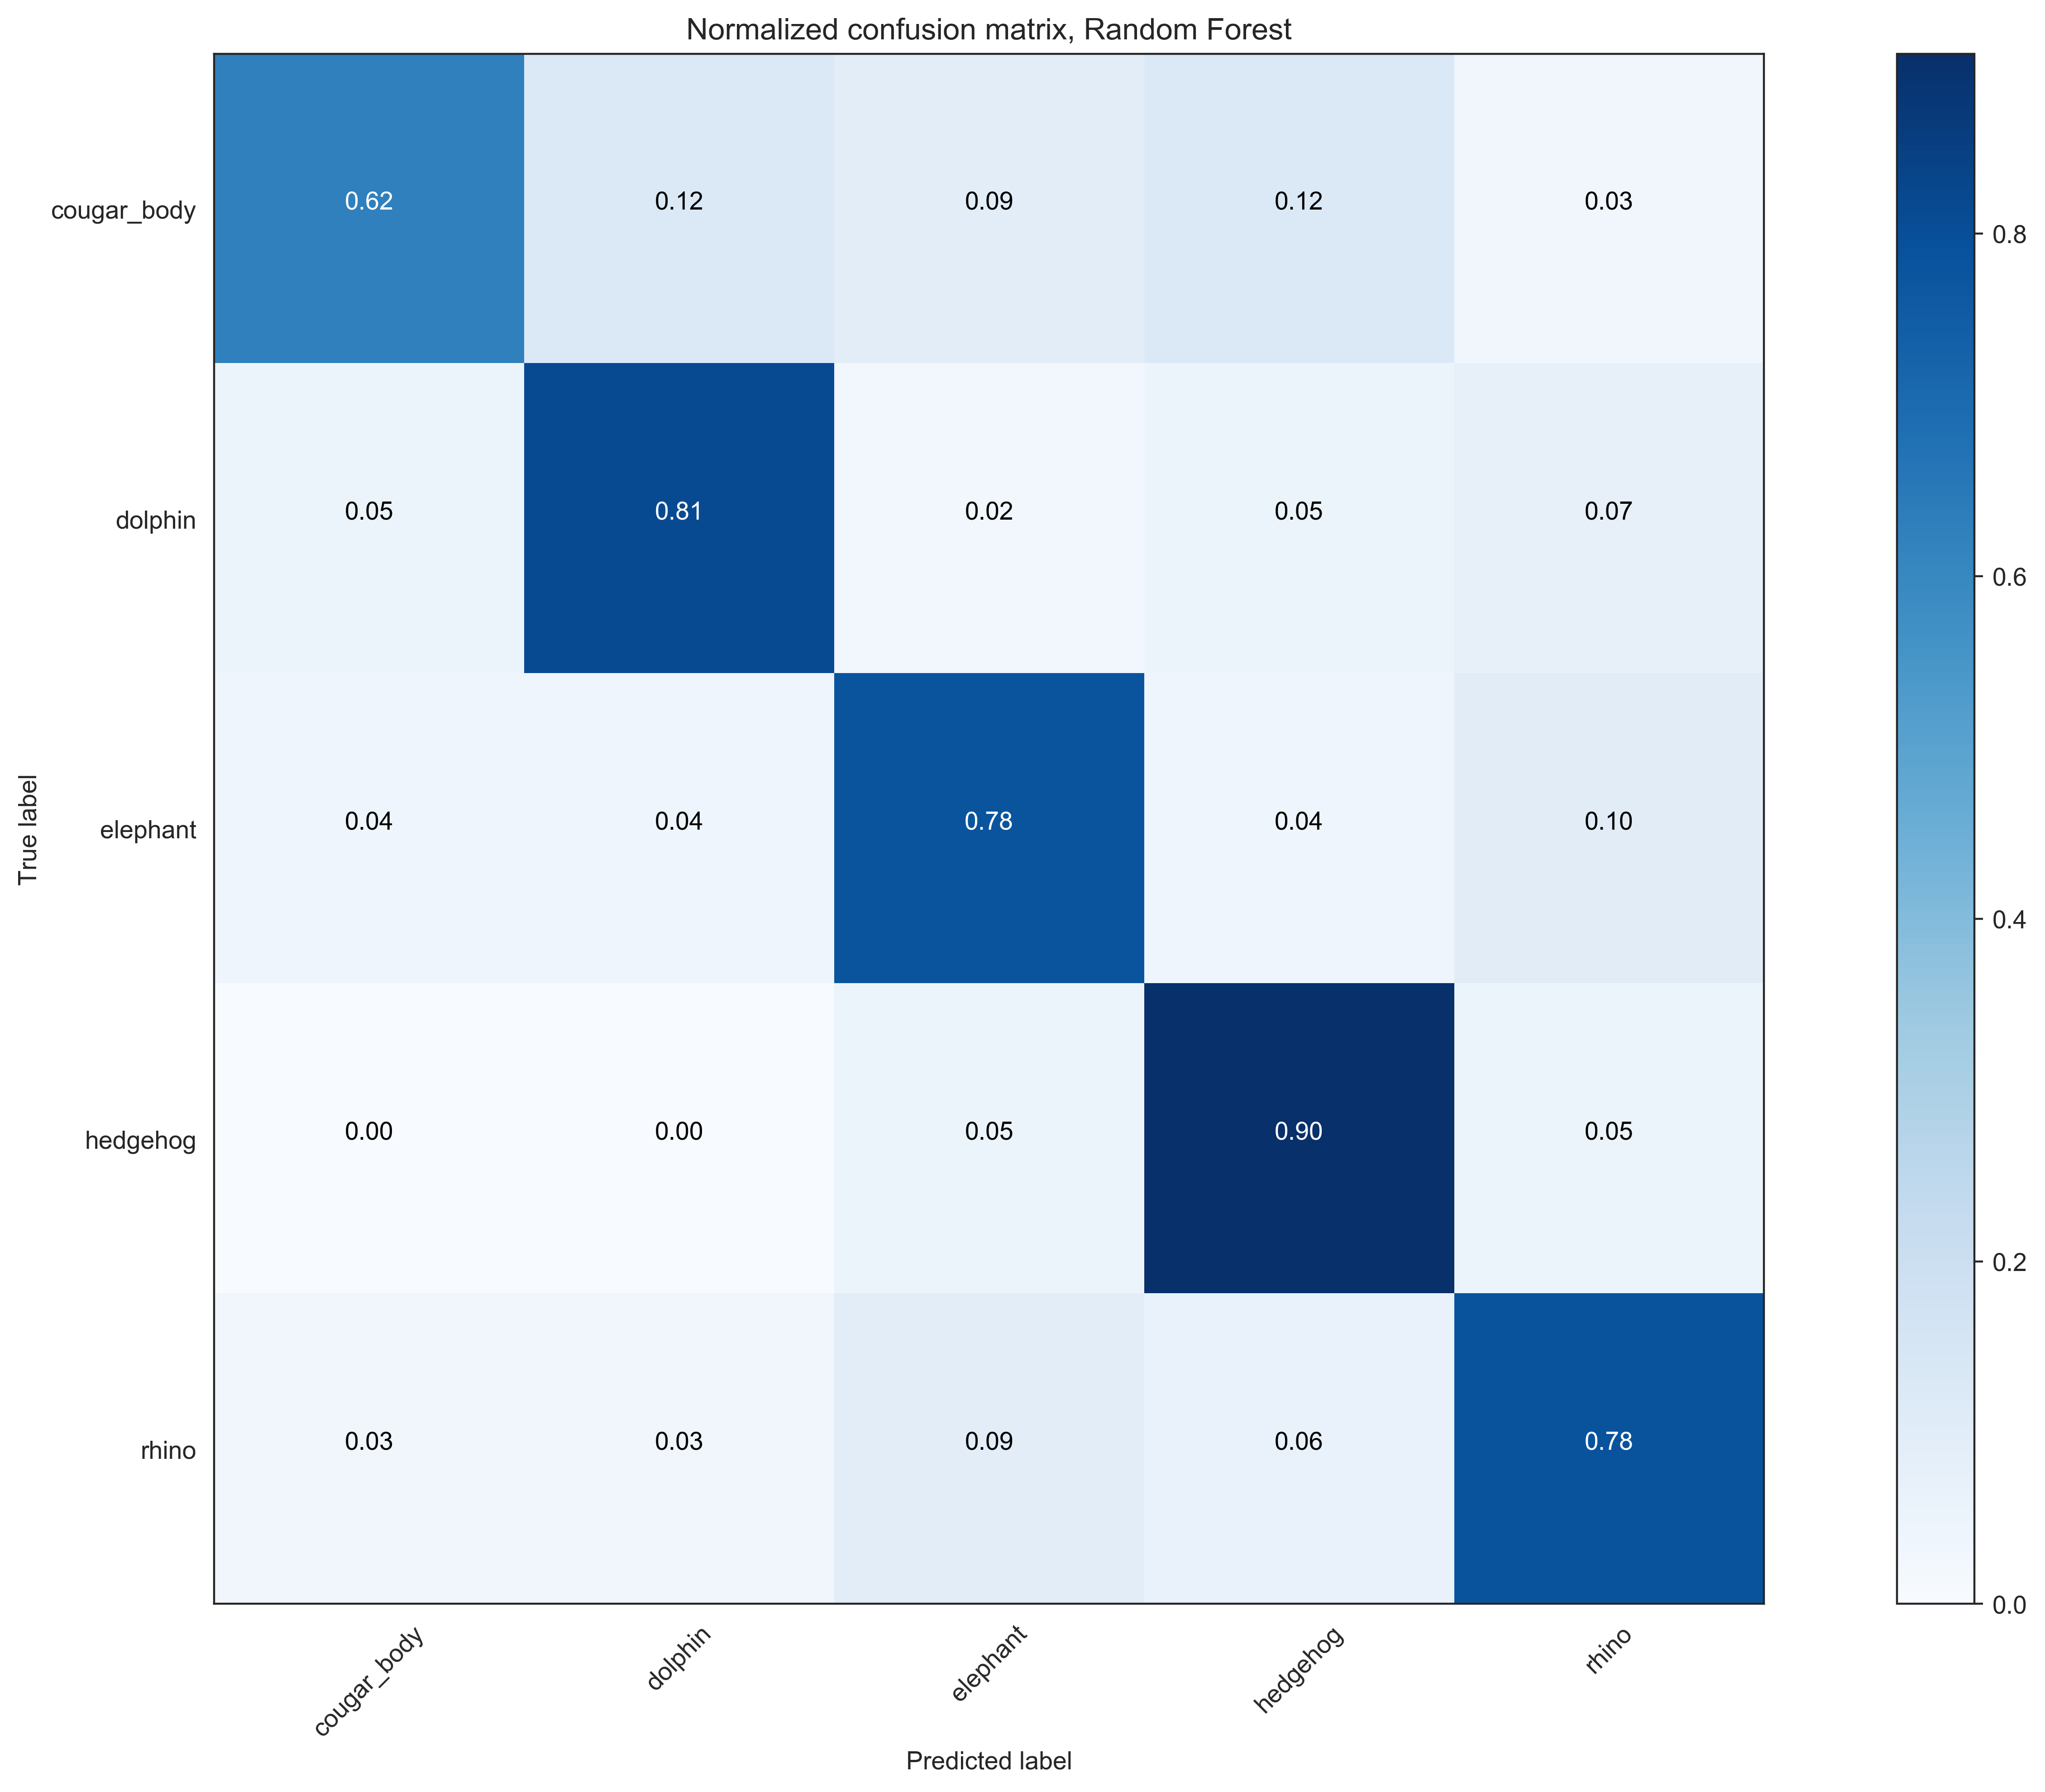

In [98]:
#accuracy(confusion matrix): for best params of a certain model
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

#def class_name
class_names = np.unique(df_2['label']) #change the name of dataset if necessary
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
with plt.style.context('seaborn-bright'):
    plt.figure(figsize = (15,10), dpi = 400) #add dpi = 400 or other numbers if high resolution image is required
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix, Random Forest')
    #plt.savefig("PCA_images/cm_RF_PCA.png", dpi=400)

Average: 76.52%


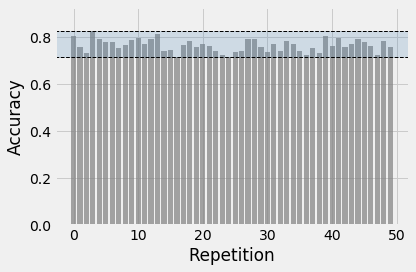

In [28]:
#RF repeated sampling result(with best param.)  ##IS the model sensitive to the choice of traing dataset?
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]

pred_2 = []

for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(df_2.iloc[:,:30],
                                                        df_2['label'],
                                                        test_size=0.1, 
                                                        random_state=i,
                                                        stratify=y)
    y_pred_i = rf_best.fit(X_train, y_train).predict(X_test)
    y_pred_i_acc = np.mean(y_test == y_pred_i)
    pred_2.append(y_pred_i_acc)

pred_2 = np.asarray(pred_2)
print('Average: %.2f%%' % (pred_2.mean()*100))

with plt.style.context(('fivethirtyeight')):
    plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
    plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
    plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
    plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
    plt.ylim([0, pred_2.max() + 0.1])
    plt.xlabel('Repetition')
    plt.ylabel('Accuracy')
    #plt.ylim([0.5, 1.05])
    plt.tight_layout()
    plt.show()

In [99]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# build a classifier
rf = SVC()


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"kernel":['rbf', 'poly', 'sigmoid'], "gamma":[1, 0.1, 0.05, 0.01], "C":[1, 20, 50, 100]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)


RandomizedSearchCV took 29.19 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.698 (std: 0.013)
Parameters: {'kernel': 'poly', 'gamma': 0.01, 'C': 20}

Model with rank: 1
Mean validation score: 0.698 (std: 0.013)
Parameters: {'kernel': 'poly', 'gamma': 0.1, 'C': 50}

Model with rank: 1
Mean validation score: 0.698 (std: 0.013)
Parameters: {'kernel': 'poly', 'gamma': 1, 'C': 1}

Model with rank: 1
Mean validation score: 0.698 (std: 0.013)
Parameters: {'kernel': 'poly', 'gamma': 1, 'C': 50}

Model with rank: 1
Mean validation score: 0.698 (std: 0.013)
Parameters: {'kernel': 'poly', 'gamma': 0.01, 'C': 50}



In [19]:
from sklearn.svm import SVC
svm_best = SVC(kernel='poly', gamma = 0.01, C = 50)
svm_best.fit(X_train, y_train)
svm_pred = svm_best.predict(X_test)

In [20]:
svm_best.score(X_test, y_test)

0.6919191919191919

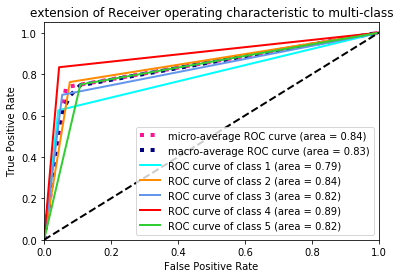

In [21]:
#AUC ROC 
##only draw the picture for the best param of a certain
#since definition of AUC ROC is for binary variable, first of all, we need to binarizing our result
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

##binarize y_test:
y_test_bi = label_binarize(le.fit_transform(y_test), [0,1,2,3,4])

##binarize predict value:
knn_bi = OneVsRestClassifier(svm_best) #change classifier here
y_score = knn_bi.fit(X_train, y_train).predict(X_test)
y_score_bi = label_binarize(le.fit_transform(y_score), [0,1,2,3,4])
#method may vary according to estimator, if the function is RandomForest or SVC 
#y_score_bi = YourClassifier.fit(list(X_train), y_train).predict(list(X_test)).decision_function(list(X_test))
lw = 2
n_classes = 5
fpr = dict() #fp rate
tpr = dict() #tp rate
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bi[:, i], y_score_bi[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bi.ravel(),  y_score_bi.ravel()) #.ravel() is the same as .reshape(-1)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'limegreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format((i+1), roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
                                          

plt.savefig('PCA_images/ROC_svm_PCA.png', dpi = 400)

Normalized confusion matrix


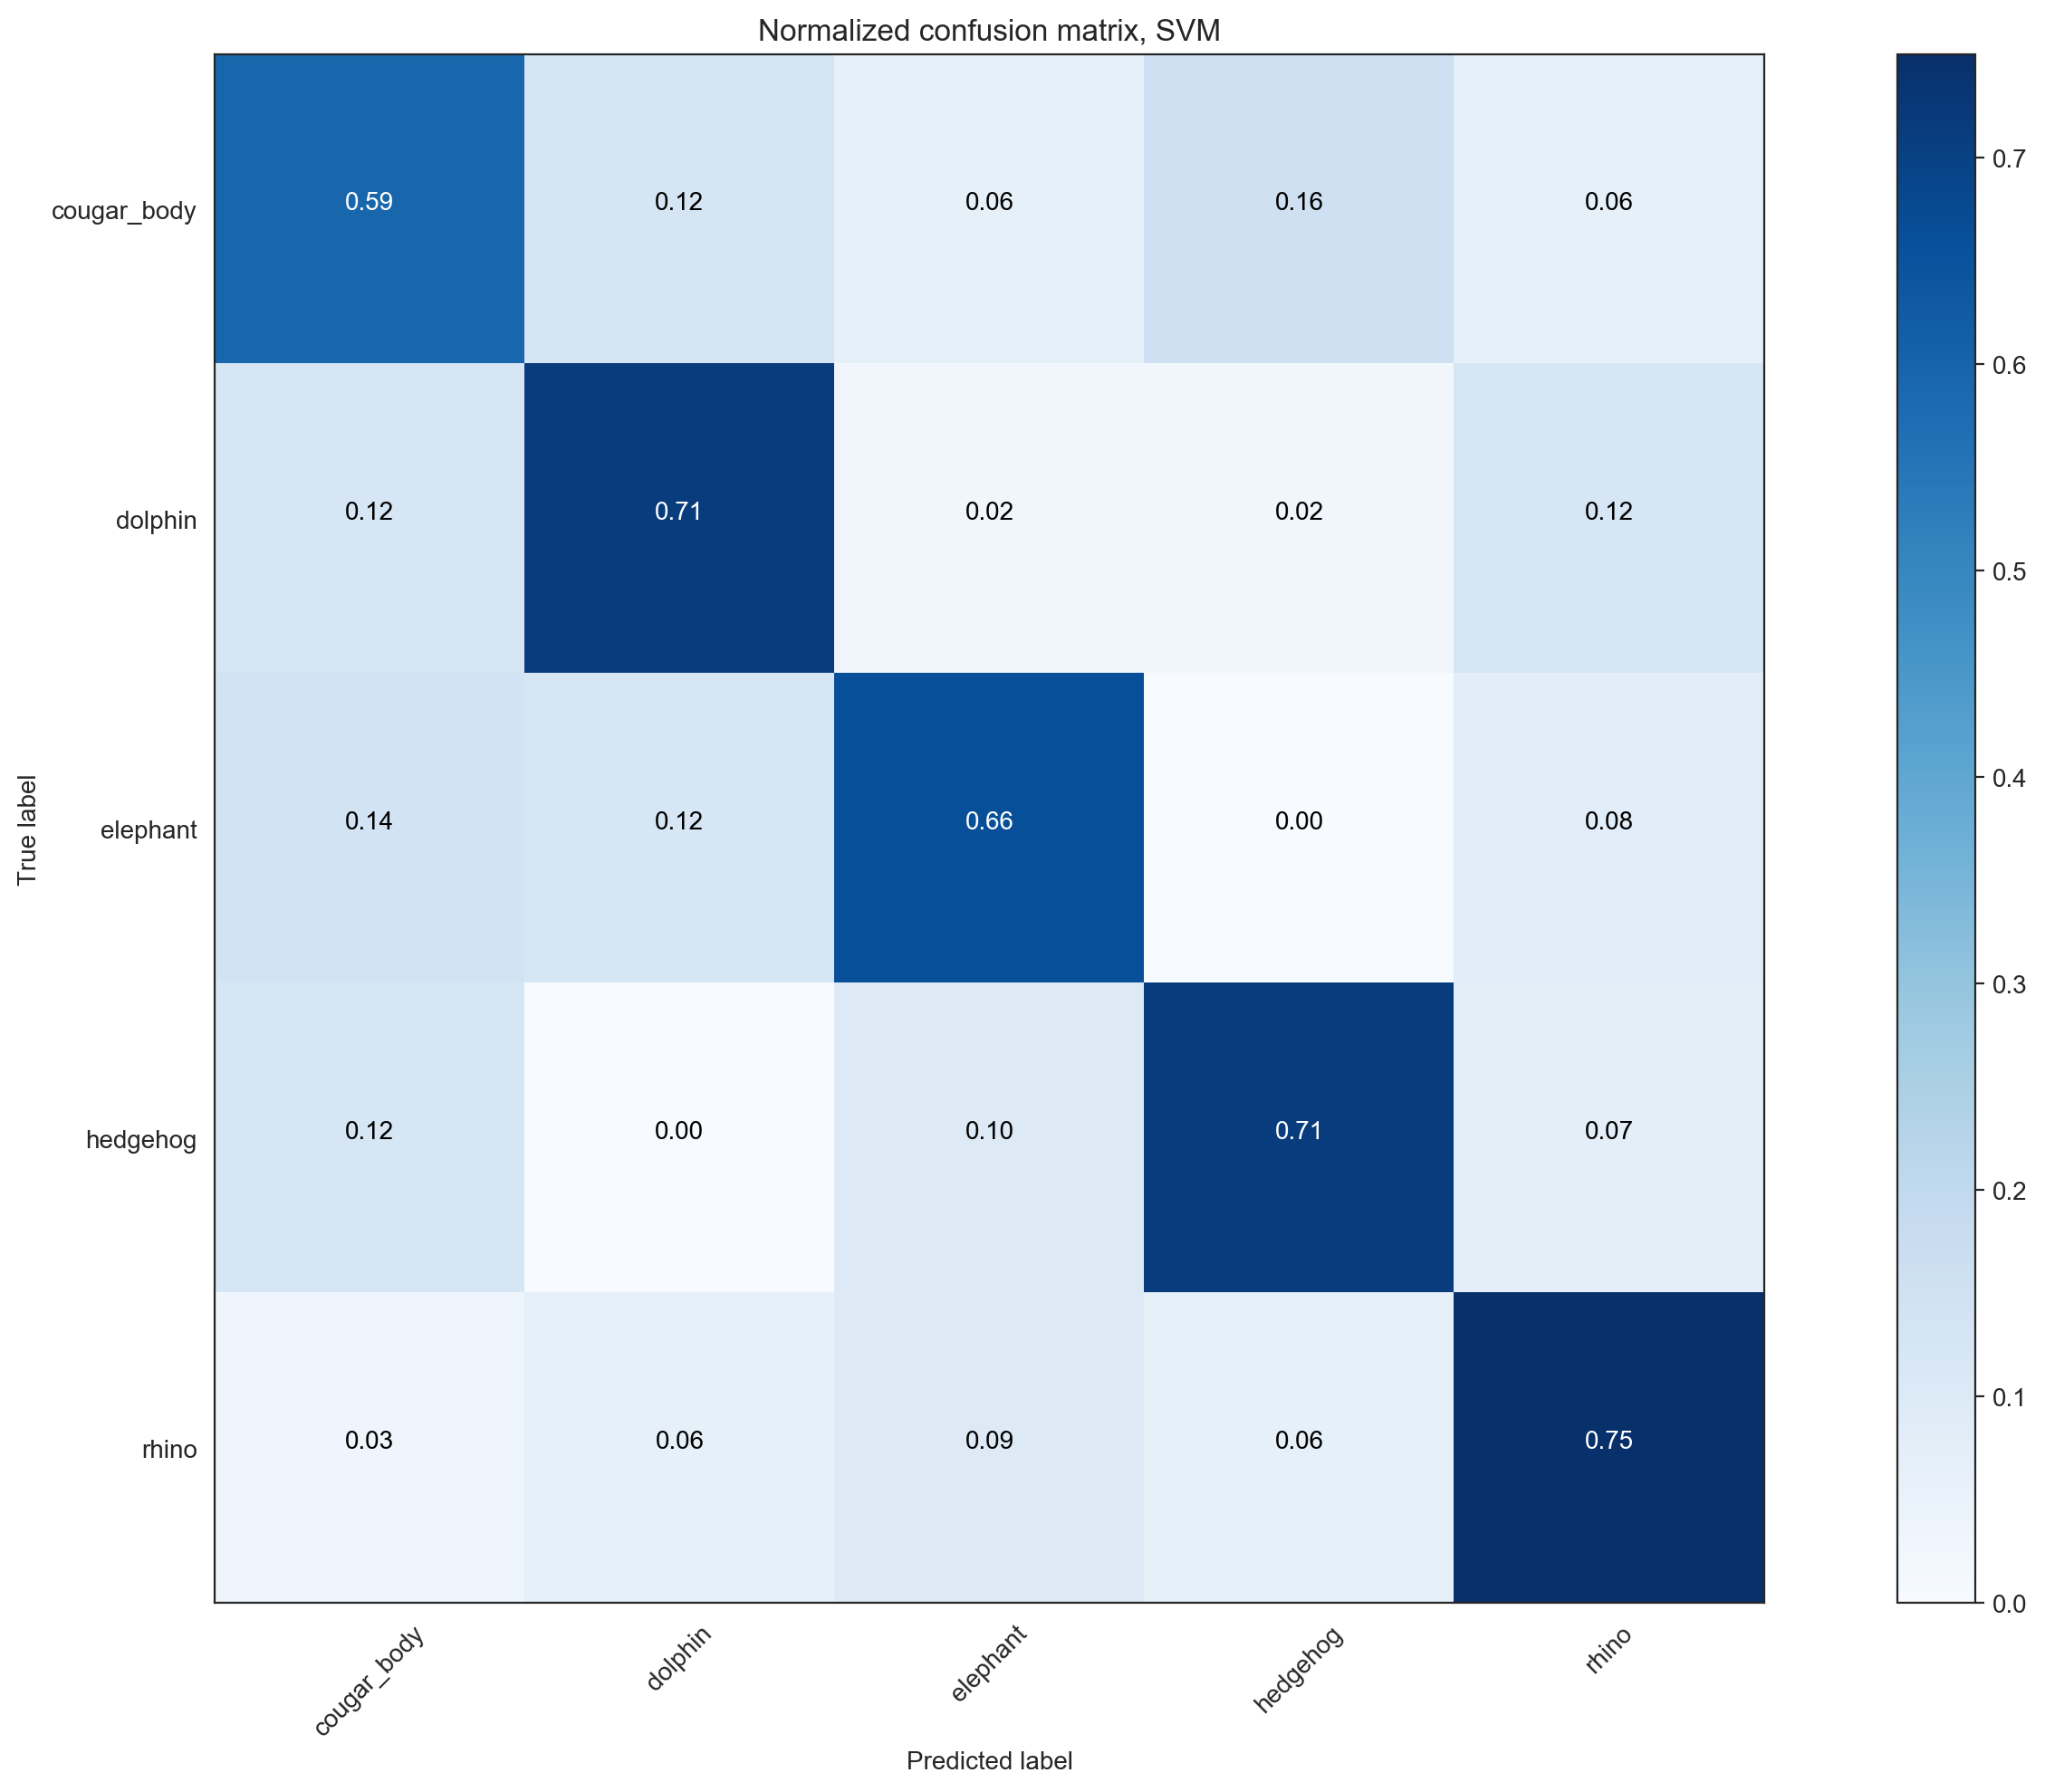

In [102]:
#accuracy(confusion matrix): for best params of a certain model
#def class_name
class_names = np.unique(df_2['label']) #change the name of dataset if necessary
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, svm_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
with plt.style.context('seaborn-bright'):
    plt.figure(figsize = (15,10), dpi = 200) #add dpi = 400 or other numbers if high resolution image is required
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix, SVM')
    #plt.savefig("PCA_images/cm_SVM_PCA.png", dpi=400)

In [103]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier 

# build a classifier
knn = KNeighborsClassifier()


# specify parameters and distributions to sample from
param_dist = {"n_neighbors": sp_randint(4, 12),
              "algorithm": ['ball_tree','kd_tree'],
              "leaf_size":[30, 50],
              "p":[1,2]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(knn, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 9.90 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.714 (std: 0.024)
Parameters: {'algorithm': 'ball_tree', 'leaf_size': 50, 'n_neighbors': 4, 'p': 1}

Model with rank: 2
Mean validation score: 0.694 (std: 0.015)
Parameters: {'algorithm': 'ball_tree', 'leaf_size': 50, 'n_neighbors': 4, 'p': 2}

Model with rank: 3
Mean validation score: 0.676 (std: 0.015)
Parameters: {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 6, 'p': 1}

Model with rank: 3
Mean validation score: 0.676 (std: 0.015)
Parameters: {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 6, 'p': 1}



In [23]:
from sklearn.neighbors import KNeighborsClassifier 
knn_best = KNeighborsClassifier(n_neighbors=4,
                                leaf_size = 50,
                                algorithm='ball_tree',
                               p=1)
knn_best.fit(X_train, y_train)
knn_pred = knn_best.predict(X_test)

In [24]:
knn_best.score(X_test, y_test)

0.7272727272727273

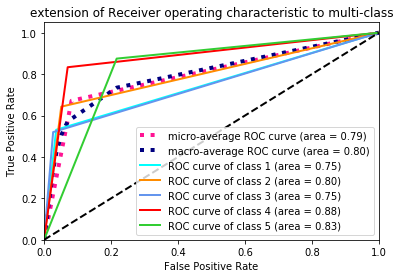

In [25]:
#AUC ROC 
##only draw the picture for the best param of a certain
#since definition of AUC ROC is for binary variable, first of all, we need to binarizing our result
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

##binarize y_test:
y_test_bi = label_binarize(le.fit_transform(y_test), [0,1,2,3,4])

##binarize predict value:
knn_bi = OneVsRestClassifier(knn_best) #change classifier here
y_score = knn_bi.fit(X_train, y_train).predict(X_test)
y_score_bi = label_binarize(le.fit_transform(y_score), [0,1,2,3,4])
#method may vary according to estimator, if the function is RandomForest or SVC 
#y_score_bi = YourClassifier.fit(list(X_train), y_train).predict(list(X_test)).decision_function(list(X_test))
lw = 2
n_classes = 5
fpr = dict() #fp rate
tpr = dict() #tp rate
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bi[:, i], y_score_bi[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bi.ravel(),  y_score_bi.ravel()) #.ravel() is the same as .reshape(-1)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'limegreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format((i+1), roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
                                          

#plt.savefig('PCA_images/ROC_knn_PCA.png', dpi = 400)

Normalized confusion matrix


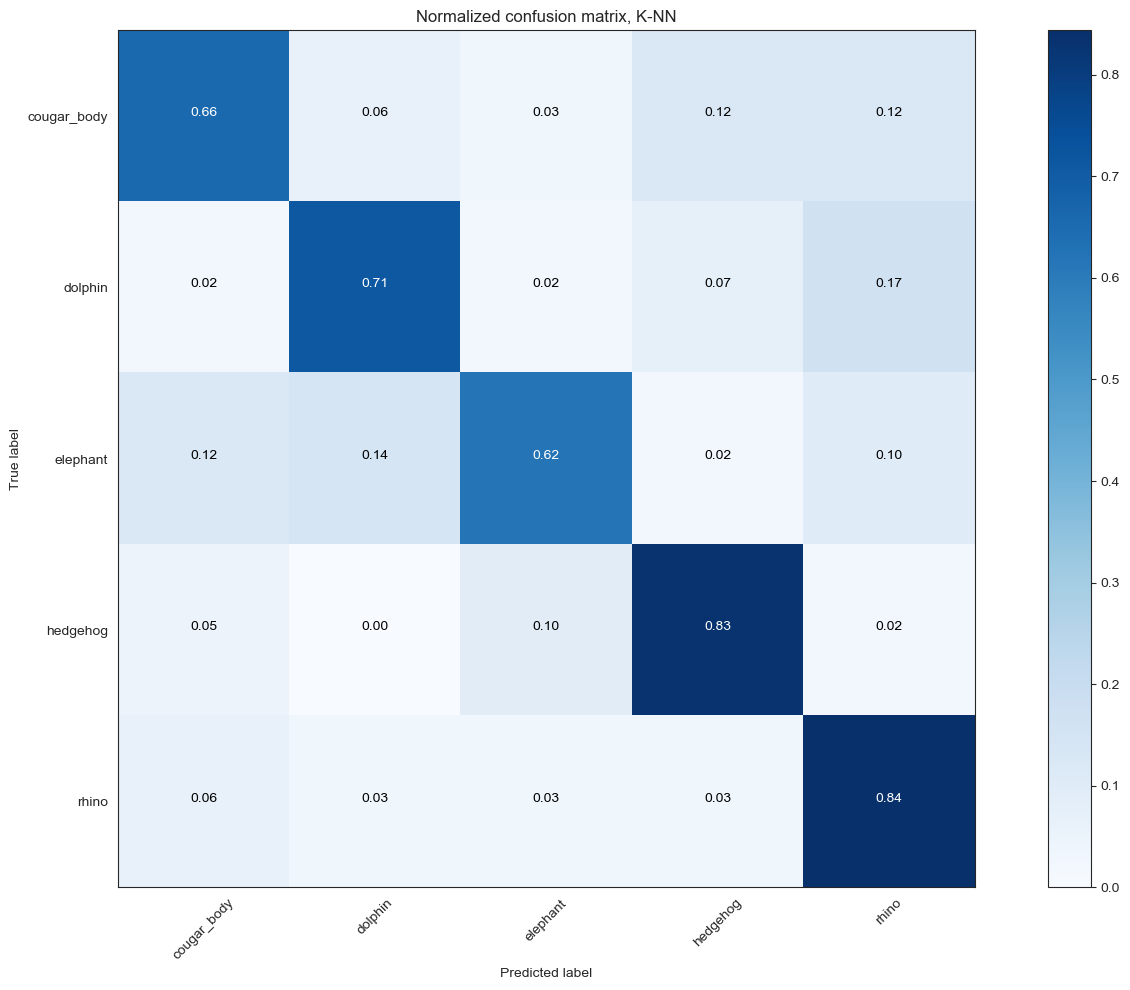

In [106]:
#accuracy(confusion matrix): for best params of a certain model
#def class_name
class_names = np.unique(df_2['label']) #change the name of dataset if necessary
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, knn_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
with plt.style.context('seaborn-bright'):
    plt.figure(figsize = (15,10), dpi = 100) #add dpi = 400 or other numbers if high resolution image is required
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix, K-NN')
    plt.savefig("PCA_images/cm_KNN_PCA.png", dpi=400)

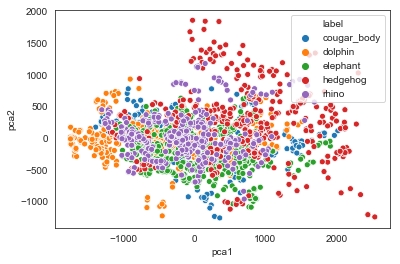

In [108]:
### PCA embedded in 2-d space
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'label', data = df_2)
#plt.savefig('PCA_images/PCA_EDA.png',dpi = 400)

### t-SNE

In [53]:
import time

from sklearn.manifold import TSNE

n_sne = 1500

rndperm = np.random.permutation(df_2.shape[0])

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_2.loc[rndperm[:n_sne],pca_feature_cols].values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.000s...
[t-SNE] Computed neighbors for 1500 samples in 0.180s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 204.164006
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.388115
[t-SNE] Error after 300 iterations: 1.390549


In [54]:
#plt.scatter(x='pca-one', y='pca-two', hue = 'label', data = df.loc[rndperm[:3000],:])

df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne['label'] = df_2['label'].values[:n_sne]


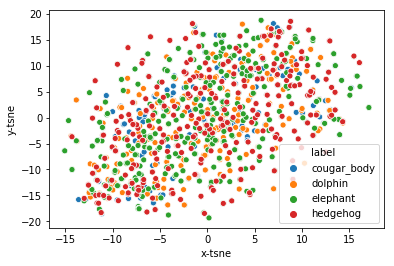

In [55]:
sns.scatterplot(x = 'x-tsne', y = 'y-tsne', hue = 'label', data = df_tsne)
#plt.savefig('PCA_images/tSNE_EDA_1.png',dpi = 400)

### 3d tSNE

In [63]:
import time
n_sne = 1900

time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_2.loc[rndperm[:n_sne],pca_feature_cols].values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1900 samples in 0.000s...
[t-SNE] Computed neighbors for 1900 samples in 0.238s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1900
[t-SNE] Computed conditional probabilities for sample 1900 / 1900
[t-SNE] Mean sigma: 201.376377
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.563622
[t-SNE] Error after 300 iterations: 1.278618


In [64]:
df_tsne3d = df.loc[rndperm[:n_sne],:].copy()
df_tsne3d['x-tsne'] = tsne_results[:,0]
df_tsne3d['y-tsne'] = tsne_results[:,1]
df_tsne3d['z-tsne'] = tsne_results[:,2]
df_tsne3d['label'] = df_2['label'].values[:n_sne]

df_tsne3d['label_num'] = df_2['label_num'].values[:n_sne]

In [65]:
df_tsne3d[df_tsne3d.columns[-4:-1]].head()

,x-tsne,y-tsne,z-tsne
659,-0.736892,-8.943563,2.832301
280,-9.941753,-0.703598,2.861983
1773,-2.055043,-4.080378,0.526915
197,0.712976,4.456509,-6.397651
1688,4.901527,2.914365,1.631954


In [ ]:
###check the form of df_tsne3d

Text(0.5,0,'tSNE_component_3')

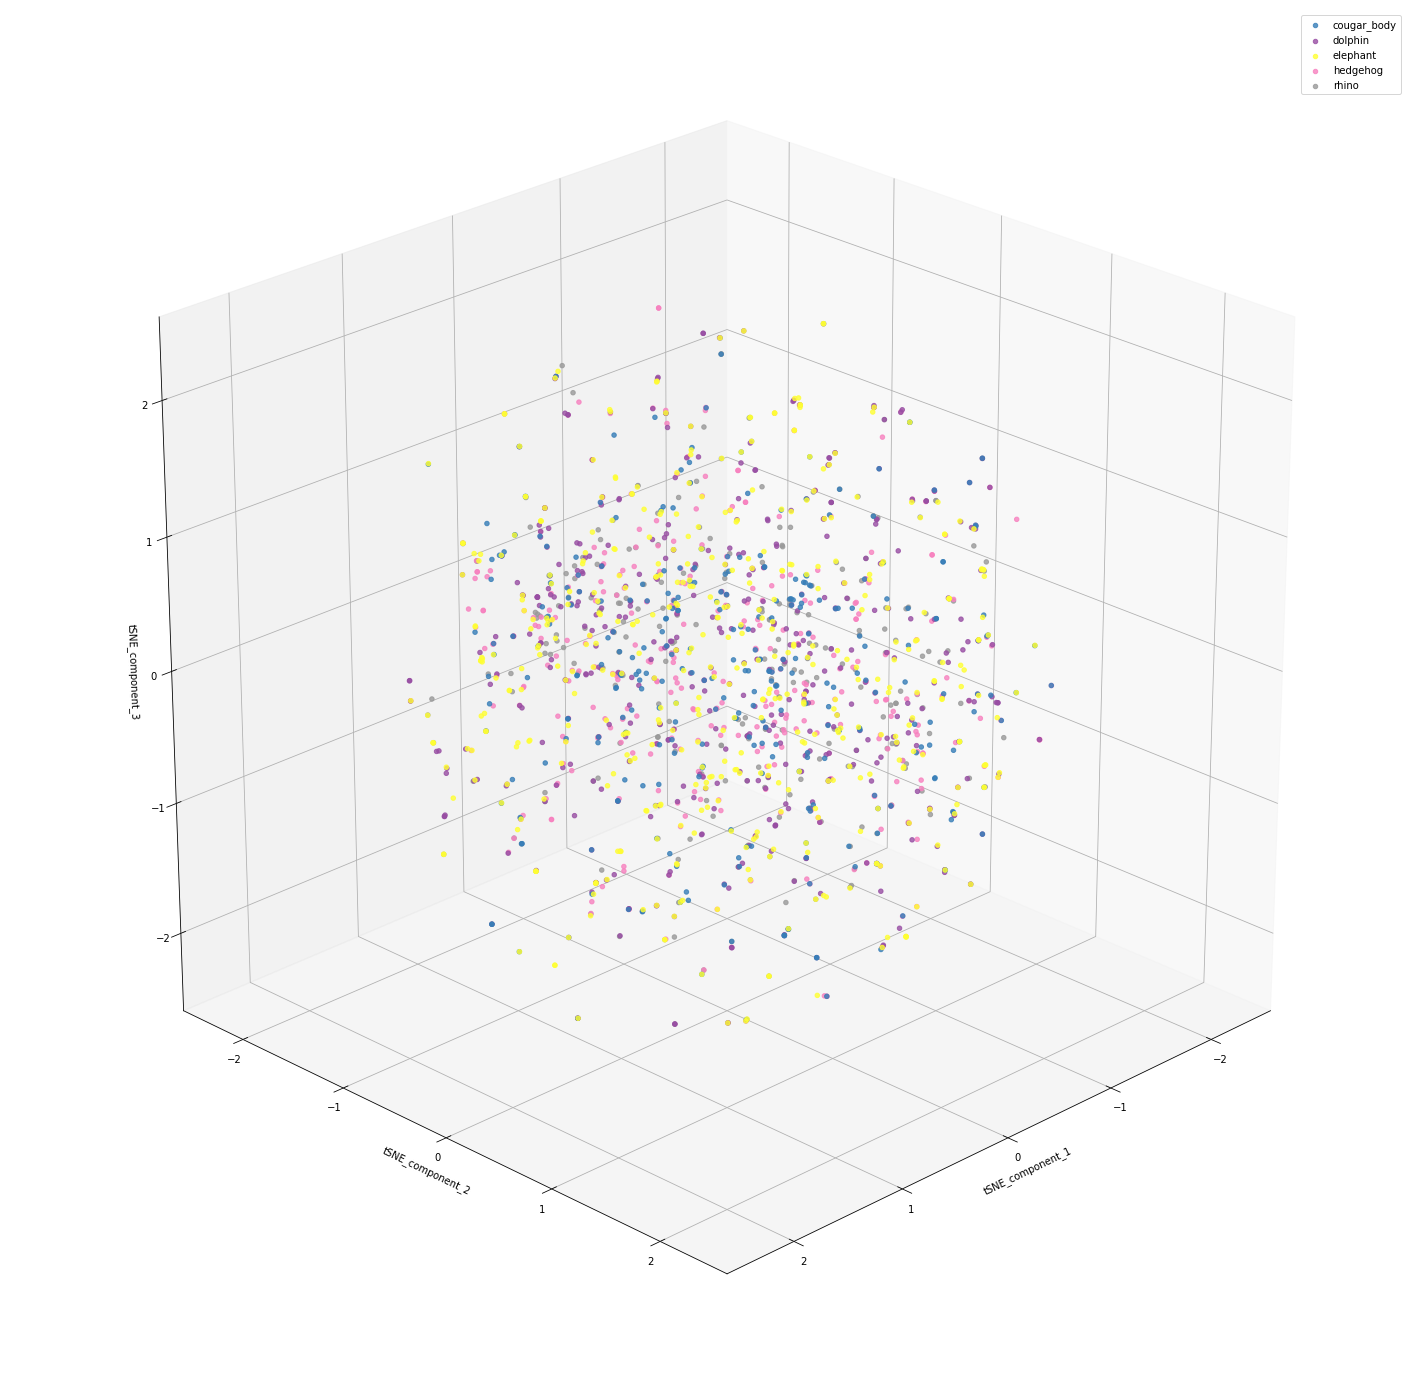

In [66]:
from sklearn.preprocessing import StandardScaler

tsne_result_scaled = StandardScaler().fit_transform(df_tsne3d[df_tsne3d.columns[-4:-1]])

label_to_id_dict = {v:i for i,v in enumerate(np.unique(df_tsne3d['label']))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111,projection='3d')

plt.grid()
    
label_ids = df_tsne3d['label_num']
#label_to_id_dict = {v:i for i,v in enumerate(np.unique(label_ids))}
#id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}
    
nb_classes = len(np.unique(label_ids))
    
for label_id in np.unique(label_ids):
    ax.scatter(tsne_result_scaled[np.where(label_ids == label_id), 0],
                tsne_result_scaled[np.where(label_ids == label_id), 1],
                tsne_result_scaled[np.where(label_ids == label_id), 2],
                alpha=0.8,
                color= plt.cm.Set1(label_id / float(nb_classes)),
                marker='o',
                label=id_to_label_dict[(label_id-1)])
ax.legend(loc='best')
ax.view_init(25, 45)
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_zlim(-2.5, 2.5)
ax.set_xlabel('tSNE_component_1')
ax.set_ylabel('tSNE_component_2')
ax.set_zlabel('tSNE_component_3')

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_tsne3d.iloc[:,-4:-1], df_tsne3d['label'],
                                                   test_size = 0.1,
                                                   random_state = 123,
                                                   shuffle = True,
                                                   stratify = y)

In [68]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# build a classifier
rf = RandomForestClassifier(n_estimators=20)

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": [3],
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 13.47 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.234 (std: 0.017)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 4}

Model with rank: 2
Mean validation score: 0.228 (std: 0.016)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 4}

Model with rank: 3
Mean validation score: 0.227 (std: 0.011)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 6}



In [129]:
rf_best = RandomForestClassifier(n_estimators=20,
                                 criterion='gini', 
                                 max_features=3, 
                                 min_samples_split=3,
                                 bootstrap=False, 
                                 max_depth=None)
rf_best.fit(X_train, y_train)
rf_best.score(X_test, y_test)

0.7942857142857143

In [131]:
rf_pred = rf_best.predict(X_test)

Normalized confusion matrix


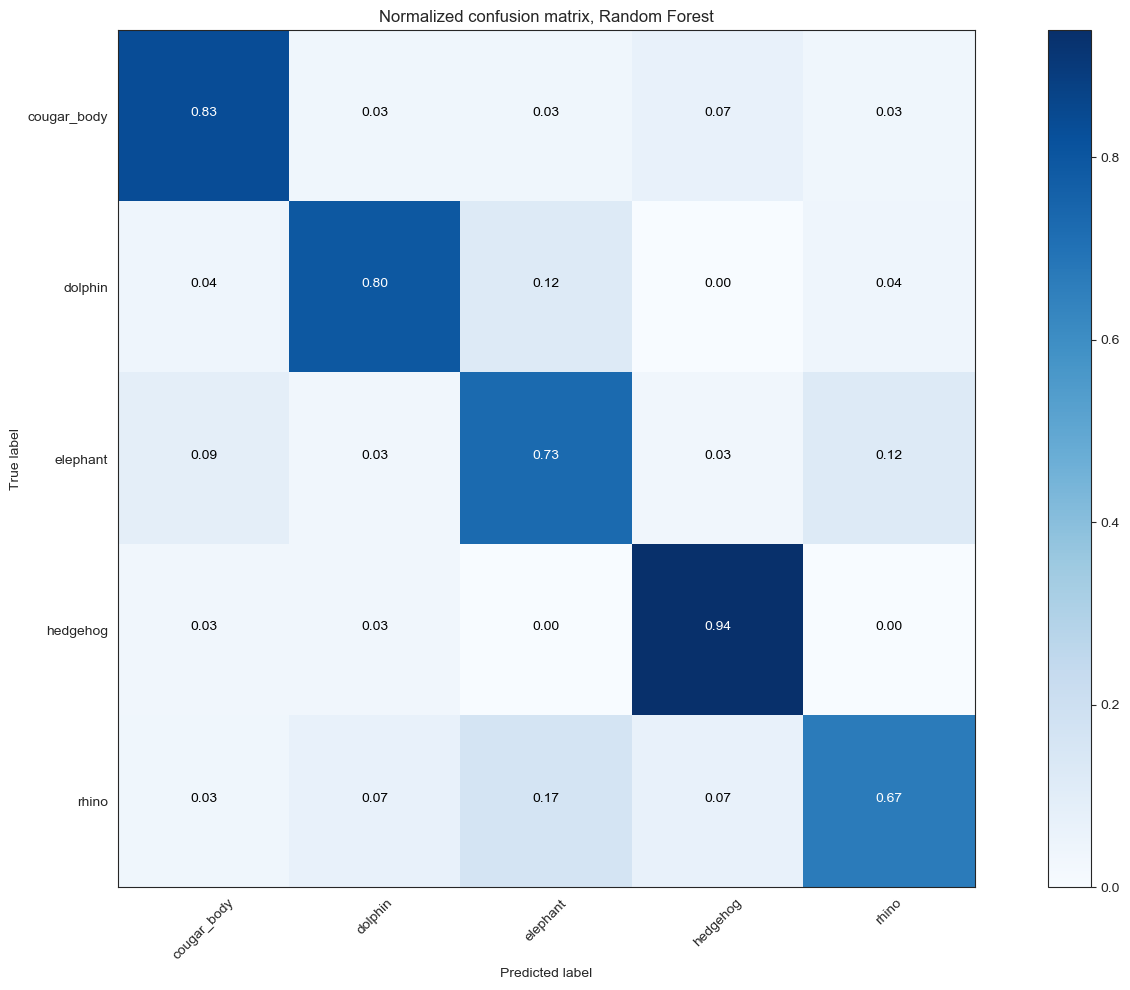

In [132]:
#accuracy(confusion matrix): for best params of a certain model
from sklearn.metrics import confusion_matrix


#def class_name
class_names = np.unique(df_tsne3d['label']) #change the name of dataset if necessary
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
with plt.style.context('seaborn-bright'):
    plt.figure(figsize = (15,10), dpi = 100) #add dpi = 400 or other numbers if high resolution image is required
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix, Random Forest')
    #plt.savefig("PCA_images/cm_RF_tSNE.png", dpi=400)

In [ ]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# build a classifier
rf = SVC()

# specify parameters and distributions to sample from
param_dist = {"kernel":['rbf', 'poly', 'sigmoid'], "gamma":[1, 0.1, 0.05, 0.01], "C":[1, 20, 50, 100]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)


In [ ]:
svm_best = SVC(kernel='poly', gamma = 0.01, C = 50)
svm_best.fit(X_train, y_train)
svm_pred = svm_best.predict(X_test)

In [69]:
# ll = np.unique(df_tsne['label'])

In [70]:
# plt.scatter(df_tsne[df_tsne['label']==ll[0]]['x-tsne'], df_tsne[df_tsne['label']==ll[0]]['y-tsne'], 
#             marker='^', label = ll[0])
# plt.scatter(df_tsne[df_tsne['label']==ll[1]]['x-tsne'], df_tsne[df_tsne['label']==ll[1]]['y-tsne'], 
#             marker='o', label = ll[1])
# plt.scatter(df_tsne[df_tsne['label']==ll[2]]['x-tsne'], df_tsne[df_tsne['label']==ll[2]]['y-tsne'], 
#             marker='<', label = ll[2])
# plt.scatter(df_tsne[df_tsne['label']==ll[3]]['x-tsne'], df_tsne[df_tsne['label']==ll[3]]['y-tsne'], 
#             marker='>', label = ll[3])
# plt.scatter(df_tsne[df_tsne['label']==ll[4]]['x-tsne'], df_tsne[df_tsne['label']==ll[4]]['y-tsne'], 
#             marker='8', label = ll[4])
# plt.legend()